In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [22]:
# 2 methods for accessign root
# (__file__) -> This method only works for .py files
# .cwd() works for both but it is better suited for .ipynb files

In [35]:
PROJECT_ROOT = Path.cwd().parent.parent
DATA_DIR = PROJECT_ROOT /"Subscribly" / "data" / "raw"

In [37]:
df = pd.read_csv(DATA_DIR / "customer_churn_dataset-training-master.csv")

# Understanding the Structure

In [38]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [39]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
117004,120717.0,64.0,Male,54.0,12.0,4.0,25.0,Standard,Quarterly,258.00,5.0,1.0
158579,163390.0,55.0,Female,20.0,12.0,5.0,6.0,Basic,Monthly,340.00,24.0,1.0
251653,258751.0,63.0,Male,32.0,10.0,0.0,19.0,Standard,Quarterly,145.26,27.0,1.0
242231,248896.0,23.0,Female,57.0,16.0,0.0,15.0,Basic,Annual,599.49,16.0,1.0
176931,181742.0,50.0,Male,8.0,23.0,4.0,4.0,Premium,Monthly,796.00,20.0,1.0


In [48]:
df.shape

(440833, 12)

In [41]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [73]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [75]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [77]:
df.duplicated().sum()

np.int64(0)

# Initial Observations 
Customer Id -> I dont think it will play a role in prediction  

Age -> Should be in Integer.  

Gender -> Its Fine, It should be str only.  

Tenure -> It should be in either months / weeks / days -> No clear idea.  

Usage Frquency -> It should be in months / weeks / days (Need More Clarity)  

Support Calls -> Should Be Int  

Payment Delay -> It should be in months / weeks / days -> Need to research on this  

Total Spend -> Its Fine  

Last Interaction -> It should be in either of months / weeks / days  

Chirn -> Target Column  

# Column Wise Study -> Univariate EDA

# CustomerID

In [45]:
df['CustomerID'].nunique()

440832

In [46]:
df['CustomerID'].isnull().sum()

np.int64(1)

In [47]:
df[df['CustomerID'].isnull()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Everything is Null Here , we can drop this row.

idx -> 199295

# Age

Points to Note : 
1. It is a numerical Column
2. It is in float (Has to be Converted into Int)

In [67]:
df['Age'].isnull().sum()

np.int64(1)

In [68]:
df[df['Age'].isnull()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df['Age'].describe()

count    440832.000000
mean         39.373153
std          12.442369
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: Age, dtype: float64

In [51]:
df[df['Age'] == df['Age'].min()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
29,32.0,18.0,Male,37.0,15.0,8.0,6.0,Premium,Monthly,800.00,29.0,1.0
52,58.0,18.0,Male,55.0,29.0,9.0,21.0,Standard,Quarterly,296.00,22.0,1.0
126,135.0,18.0,Female,46.0,30.0,0.0,5.0,Basic,Quarterly,269.00,10.0,1.0
174,183.0,18.0,Male,3.0,2.0,4.0,25.0,Standard,Annual,228.00,5.0,1.0
177,186.0,18.0,Female,27.0,23.0,1.0,11.0,Premium,Annual,729.00,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440543,448281.0,18.0,Male,36.0,24.0,1.0,16.0,Standard,Annual,873.56,7.0,0.0
440617,448355.0,18.0,Female,28.0,14.0,0.0,19.0,Standard,Annual,524.29,5.0,0.0
440646,448384.0,18.0,Male,42.0,21.0,0.0,8.0,Basic,Annual,908.64,24.0,0.0
440666,449093.0,18.0,Male,16.0,13.0,0.0,11.0,Standard,Annual,879.91,26.0,0.0


In [53]:
df[df['Age'] == df['Age'].min()].shape

(8219, 12)

In [54]:
df[df['Age'] == df['Age'].max()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
27,30.0,65.0,Female,29.0,29.0,0.0,5.0,Premium,Annual,857.00,18.0,1.0
72,79.0,65.0,Female,33.0,28.0,9.0,22.0,Premium,Monthly,383.00,17.0,1.0
210,219.0,65.0,Male,44.0,4.0,10.0,28.0,Standard,Quarterly,890.00,15.0,1.0
215,224.0,65.0,Male,33.0,13.0,2.0,23.0,Standard,Annual,142.00,27.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253151,260265.0,65.0,Male,4.0,9.0,10.0,8.0,Basic,Quarterly,986.91,19.0,1.0
253311,260425.0,65.0,Female,4.0,21.0,1.0,23.0,Standard,Monthly,710.03,29.0,1.0
253509,260623.0,65.0,Male,32.0,23.0,3.0,12.0,Standard,Annual,445.27,30.0,1.0
253522,260636.0,65.0,Male,3.0,22.0,10.0,22.0,Basic,Annual,557.90,3.0,1.0


<Axes: xlabel='Age', ylabel='Density'>

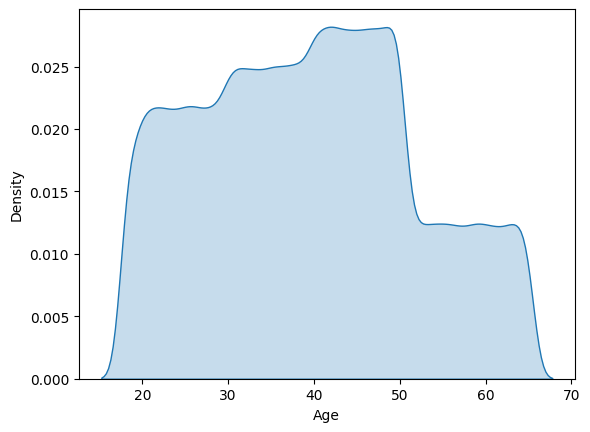

In [59]:
sns.kdeplot(df['Age'] , fill = True)

Checking Outliers

<Axes: ylabel='Age'>

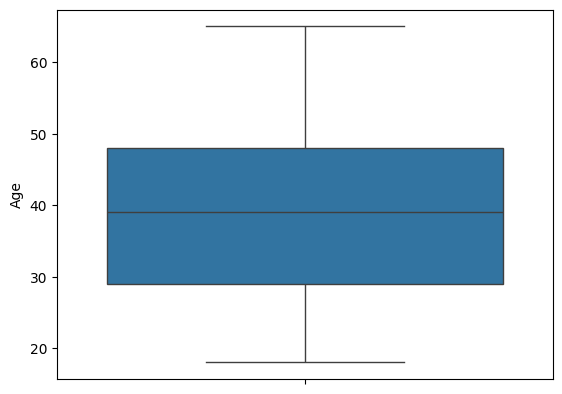

In [61]:
sns.boxplot(y= df['Age'])

In [62]:
# Using IQR Method

In [66]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[((df['Age'] > upper_bound) | (df['Age'] < lower_bound))]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [69]:
def IQR(col : pd.Series) -> tuple[int,int]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [70]:
lb , ub = IQR(df['Age'])

In [71]:
df[((df['Age'] > ub) | (df['Age'] < lb))]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [78]:
df['Age'].median()

np.float64(39.0)

# Charachteristics About Age Column
1. It has Only 1 Missing Value (But all the values of other columns are also missing)
2. It has No Outliers
3. Mean and Median are approximately equal.(Hence Age is not Skewed)
4. Things to look :  

        min          18

        25%          29

        50%          39

        75%          48

        max          65


# Gender

In [80]:
df['Gender'].value_counts()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

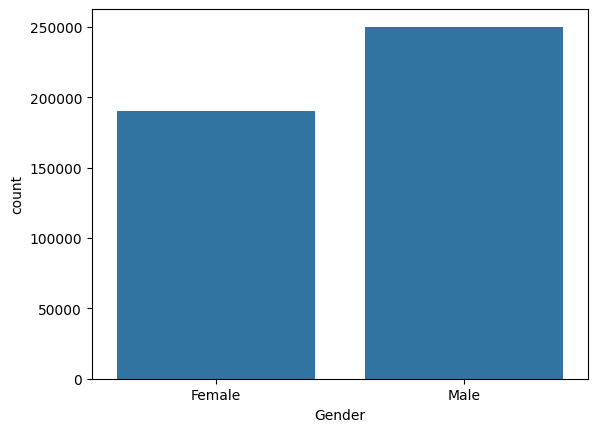

In [81]:
sns.countplot(x = df['Gender'])

In [87]:
Male_dist = df[df['Gender'] == 'Male'].shape[0] / df['Gender'].shape[0]
Female_dist = df[df['Gender'] == 'Female'].shape[0] / df['Gender'].shape[0]

In [90]:
print(Male_dist, Female_dist)

0.5676798243325704 0.4323179072347125


# Charachteristics About Gender Column

1. We only have 2 categories -> (M and F)
2. Males are around 57% 
3. Females are around 43%

# Tenure

In [92]:
df['Tenure'].describe()

count    440832.000000
mean         31.256336
std          17.255727
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64

In [93]:
df['Tenure'].median()

np.float64(32.0)

<Axes: xlabel='Tenure', ylabel='Count'>

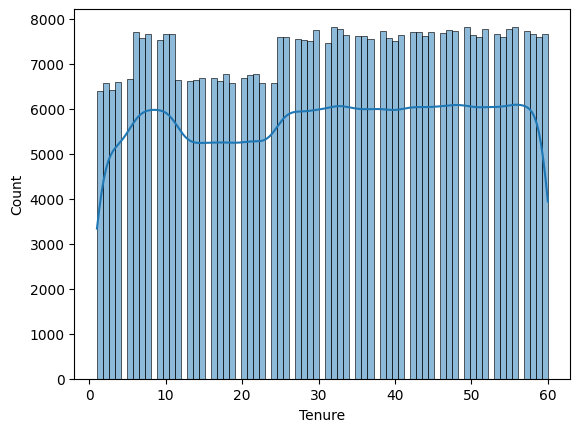

In [113]:
sns.histplot(df['Tenure'] , kde = True)

<Axes: ylabel='Tenure'>

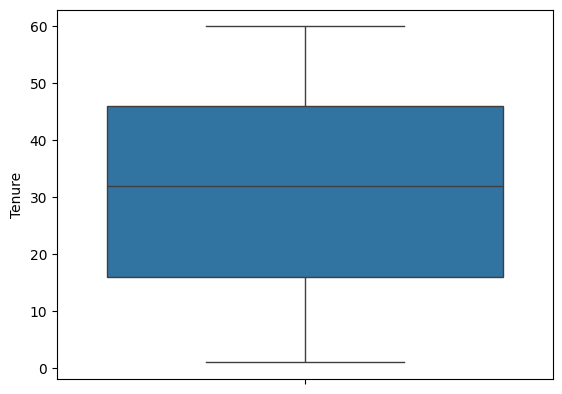

In [114]:
sns.boxplot(y = df['Tenure'])

In [116]:
lb , ub = IQR(df['Tenure'])

df[((df['Tenure'] > ub) | (df['Tenure'] < lb))]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [117]:
df['Tenure'].isnull().sum()

np.int64(1)

# Charachteristics About Tenure Column
1. There are no suspicious outliers
2. The data strong suggests that tenure is in Months
3. Only 1 Missing Value.
4. Mean and Median are same.

# Usage Frequency

In [119]:
df['Usage Frequency'].describe()

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64

In [120]:
lb , ub = IQR(df['Usage Frequency'])

df[((df['Usage Frequency'] > ub) | (df['Usage Frequency'] < lb))]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


<Axes: ylabel='Usage Frequency'>

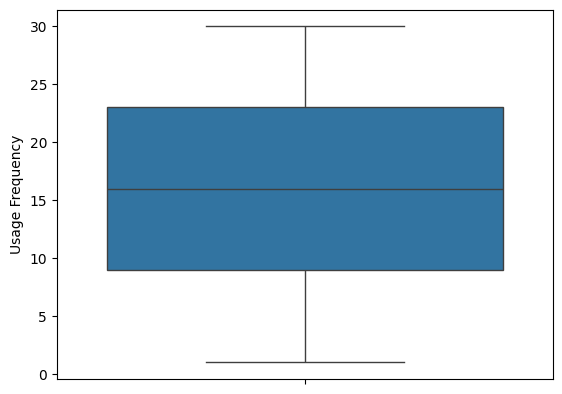

In [122]:
sns.boxplot(y=df['Usage Frequency'])

In [123]:
df['Usage Frequency'].median()

np.float64(16.0)

<Axes: xlabel='Usage Frequency', ylabel='Count'>

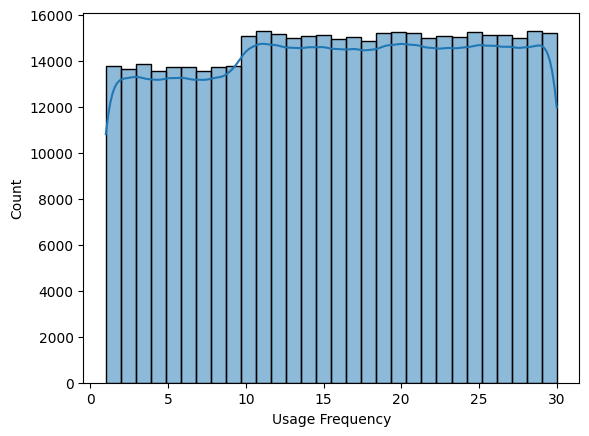

In [125]:
sns.histplot(x = df['Usage Frequency'], kde = True , bins = 30)

# Charachteristics of Usage Frequncy Column
1. There are no Outliers.
2. Mean and Median are almost equal
3. Usage Frequnecy Implies the Avg Activity of the User with Subscribly App on Per month.

# Support Calls

In [126]:
df['Support Calls'].describe()

count    440832.000000
mean          3.604437
std           3.070218
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: Support Calls, dtype: float64

In [127]:
df['Support Calls'].median()

np.float64(3.0)

<Axes: ylabel='Support Calls'>

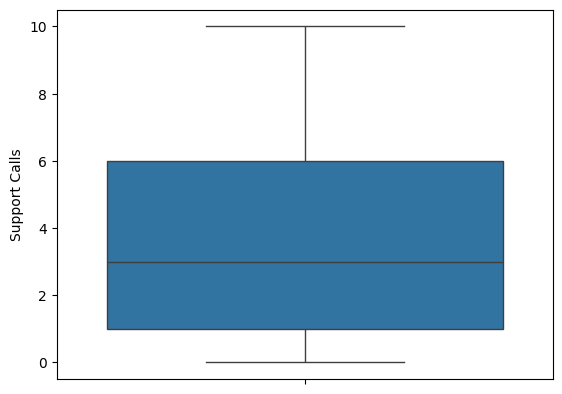

In [128]:
sns.boxplot(y=df['Support Calls'])

<Axes: xlabel='Support Calls', ylabel='Count'>

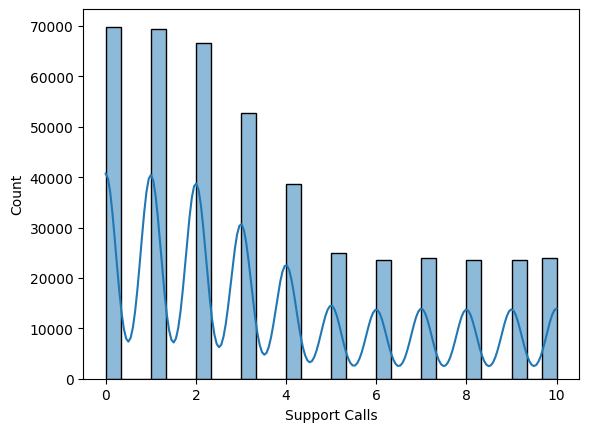

In [130]:
sns.histplot(x = df['Support Calls'], bins=30, kde=True)

In [134]:
df[df['Support Calls'] == 0][['Payment Delay' ,'Usage Frequency', 'Last Interaction',  'Churn']].sample(5)

,Payment Delay,Usage Frequency,Last Interaction,Churn
255004,3.0,24.0,29.0,0.0
348098,13.0,12.0,15.0,0.0
363624,17.0,20.0,12.0,0.0
422710,19.0,29.0,4.0,0.0
119808,14.0,14.0,16.0,1.0


# Charachteristics of Support Calls Column
1. Mean and Meadian have no majot difference.
2. No Outliers in the data.
3. Customers are leaving even without support Calls

# Payment Delay

In [135]:
df['Payment Delay'].describe()

count    440832.000000
mean         12.965722
std           8.258063
min           0.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          30.000000
Name: Payment Delay, dtype: float64

In [136]:
df['Payment Delay'].median()

np.float64(12.0)

<Axes: ylabel='Payment Delay'>

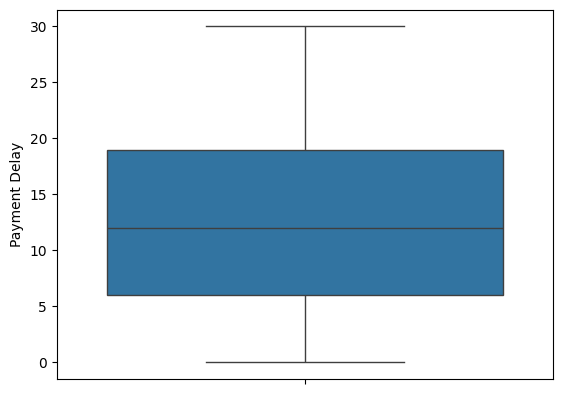

In [137]:
sns.boxplot(y = df['Payment Delay'])

In [138]:
lb , ub = IQR(df['Usage Frequency'])

df[((df['Usage Frequency'] > ub) | (df['Usage Frequency'] < lb))]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [139]:
df['Payment Delay'].isnull().sum()

np.int64(1)

<Axes: xlabel='Payment Delay', ylabel='Count'>

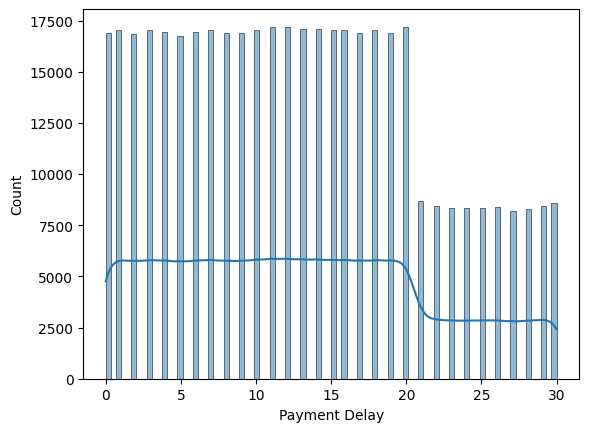

In [140]:
sns.histplot(x = df['Payment Delay'] , kde = True)

# Charachteristics About Payment Delay Column

1. Mean is 12.96, On an average customer takes 12.96 days to make the payment after past due dat.
2. most of the customers pay their due on time
3. No Outliers
4. Only 1 Missing values

# Subscription Type

In [141]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

<Axes: xlabel='Subscription Type', ylabel='count'>

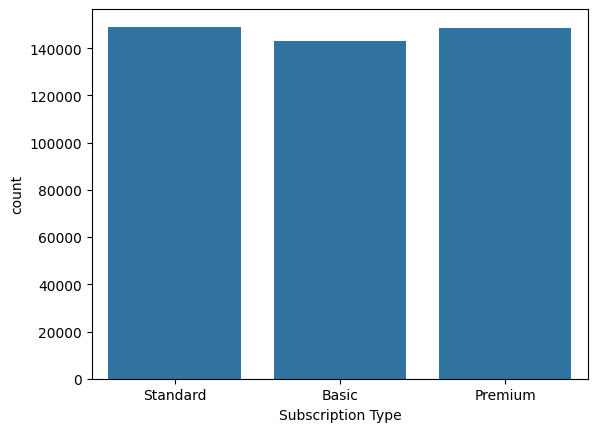

In [142]:
sns.countplot(x = df['Subscription Type'])

In [143]:
df['Subscription Type'].isnull().sum()

np.int64(1)

# Charachteristics About Subscription Type Column
1. The count of all the types are almost equal suggesting they all are qually balanced.
2. Only 1 Missing Value

# Contract Length

In [144]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

<Axes: xlabel='Contract Length', ylabel='count'>

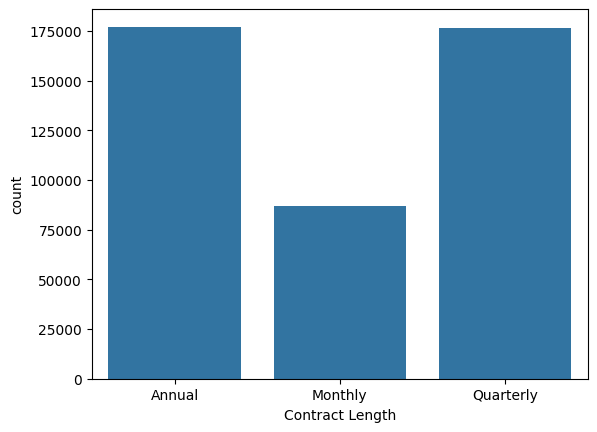

In [145]:
sns.countplot(x = df['Contract Length'])

# Charachteristics of Contract Length Column
1. Annual and Quarterly are the most popular plans with equal number of counts
2. People of Monthly Subscription are less suggesting that they may using this for seeing the services of Subscribly App.

# Total Spend

In [146]:
df['Total Spend'].describe()

count    440832.000000
mean        631.616223
std         240.803001
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: Total Spend, dtype: float64

In [148]:
df['Total Spend'].median()

np.float64(661.0)

<Axes: xlabel='Total Spend', ylabel='Count'>

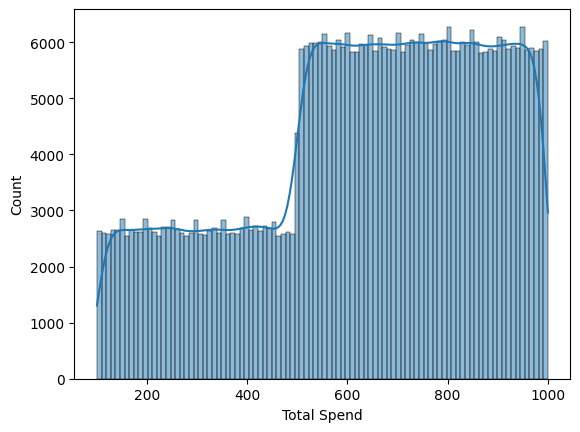

In [150]:
sns.histplot(x = df['Total Spend'], kde = True)

<Axes: ylabel='Total Spend'>

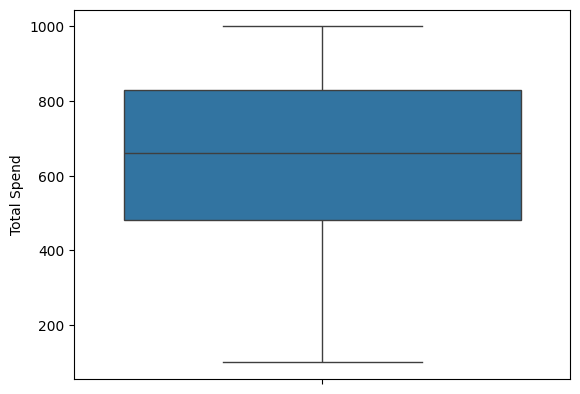

In [151]:
sns.boxplot(y = df['Total Spend'])

In [152]:
lb,ub = IQR(df['Total Spend'])

df[((df['Total Spend'] > ub) | (df['Total Spend'] < lb))]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


# Charachteristics of Total Spend Column
1. There are no Outliers
2. On an average people spend 632 units of their currency
3. Median is higher than mean -> Suggesting Left Skewed Data
4. There are 2 categories of customers the first category pays between 100 to 450 and then ther is a sudden spike in the price suggesting Premium Plans Customers

# Last Interaction

In [154]:
df['Last Interaction'].describe()

count    440832.000000
mean         14.480868
std           8.596208
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          30.000000
Name: Last Interaction, dtype: float64

In [155]:
df['Last Interaction'].median()

np.float64(14.0)

<Axes: xlabel='Last Interaction'>

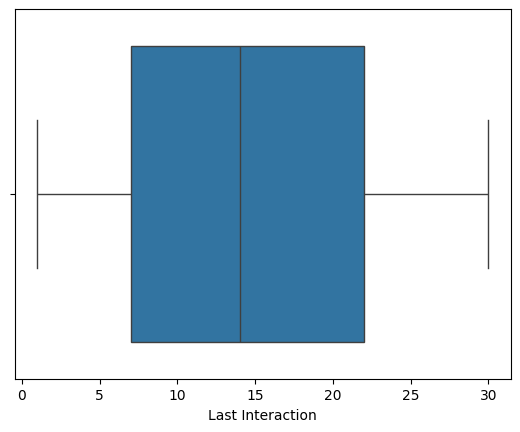

In [156]:
sns.boxplot(x=df['Last Interaction'])

<Axes: xlabel='Last Interaction', ylabel='Count'>

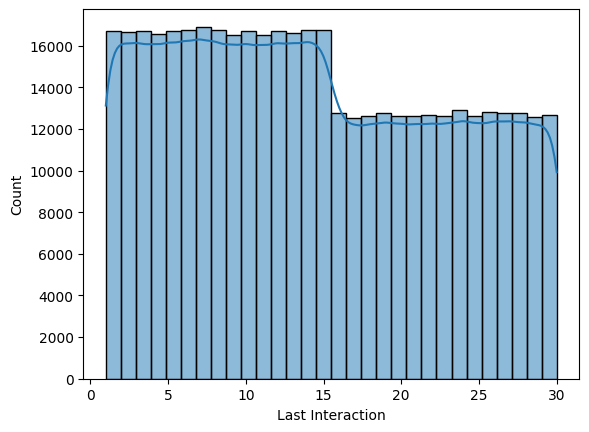

In [157]:
sns.histplot(data=df, x='Last Interaction', bins=30, kde=True)

In [160]:
df[df['Last Interaction'] == 30]['Churn'].value_counts()

Churn
1.0    8429
0.0    4225
Name: count, dtype: int64

# Charachteristics About Last Interaction
1. Min days is 1 day.
2. Max days are 30.
3. For maximum Last interaction days majority of customers left (Strong Dependence on Churning)
4. No Outlliers

# Churn (Imp)

In [162]:
df['Churn'].value_counts() 

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d4eae9ba90>,
 [Text(-0.23019184693674813, 1.0756447896977184, 'Churn'),
  Text(0.23019181274575462, -1.0756447970147134, 'No Churn')],
 [Text(-0.12555918923822623, 0.586715339835119, '56.7%'),
  Text(0.12555917058859342, -0.5867153438262072, '43.3%')])

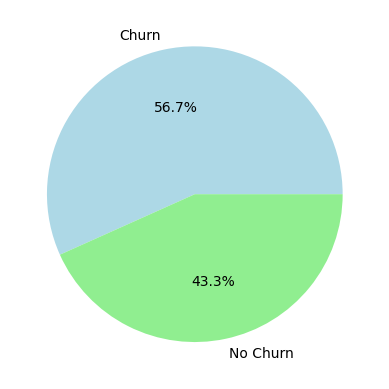

In [170]:
plt.pie(df['Churn'].value_counts() , autopct='%1.1f%%', labels = ['Churn' , 'No Churn'] , colors = ['lightblue' , 'lightgreen'])

<Axes: xlabel='Churn', ylabel='count'>

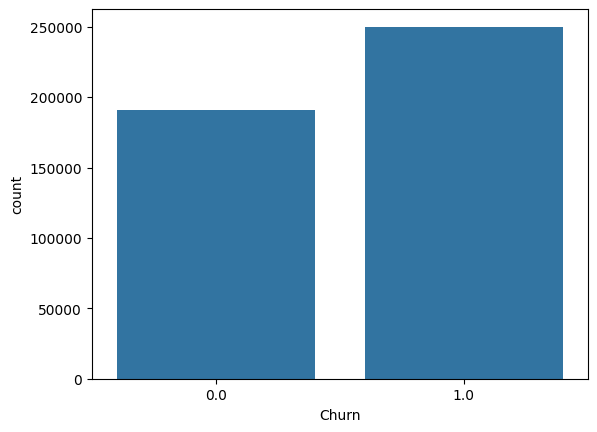

In [169]:
sns.countplot(x = df['Churn'])

# Charachteristics of Churn Column
1. Churned Customers are 57 %
2. Retained Custoemers are 43%
3. It shows that people are leaving the Subscribly app.

# Multivariate Analysis

# Customer ID

In [171]:
df['CustomerID'].corr(df['Churn'])

np.float64(-0.8393651488367958)

In [176]:
df.shape

(440833, 12)

In [175]:
df.groupby("CustomerID")["Churn"].nunique().value_counts()

Churn
1    440832
Name: count, dtype: int64

# Points to Ponder
1. Need to Drop this column as the main purpose of the column is to uniquely identify a target.

# Age

<Axes: xlabel='Age', ylabel='Churn'>

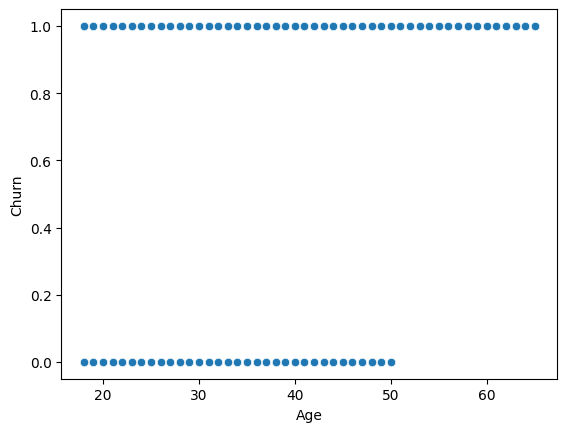

In [178]:
sns.scatterplot(x = df['Age'] , y = df['Churn'])

In [179]:
df['Age'].corr(df['Churn'])

np.float64(0.2183939185771007)

In [187]:
df.select_dtypes(include= object)

,Gender,Subscription Type,Contract Length
0,Female,Standard,Annual
1,Female,Basic,Monthly
2,Female,Basic,Quarterly
3,Male,Standard,Monthly
4,Male,Basic,Monthly
...,...,...,...
440828,Male,Premium,Annual
440829,Female,Premium,Annual
440830,Male,Standard,Quarterly
440831,Male,Standard,Quarterly


In [192]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()

In [193]:
cat_cols = df.select_dtypes(include = object).columns.tolist()

In [198]:
def scatter(target : 'str' , cols : list):
    for col in cols :
        sns.scatterplot(x = df[target] , y = df[col], hue = df['Churn'])
        plt.show()


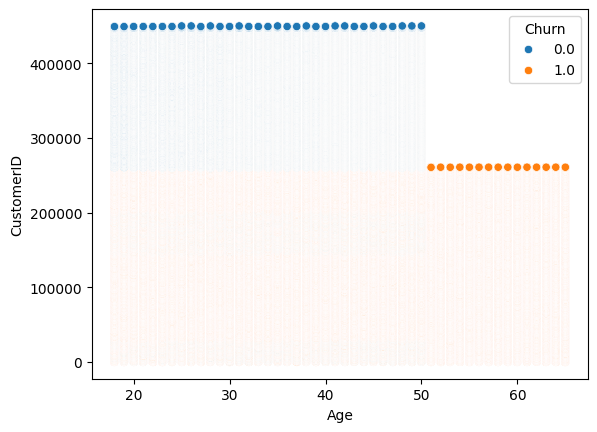

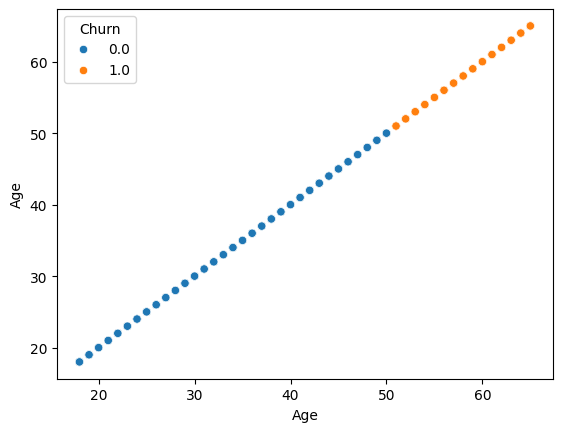

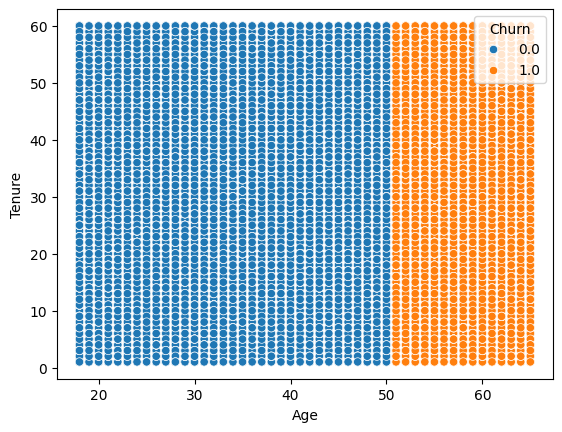

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


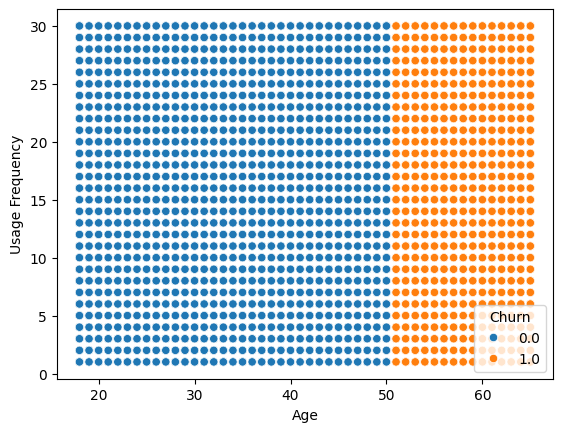

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


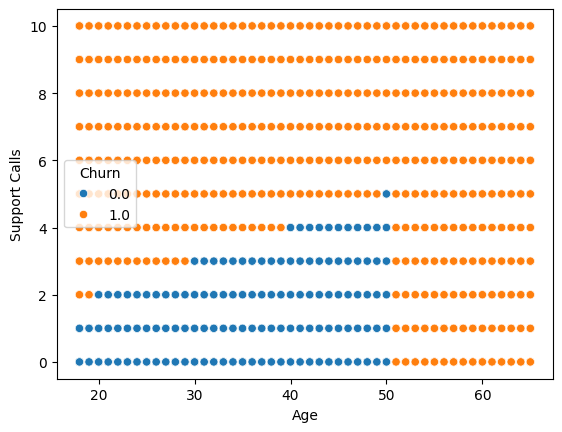

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


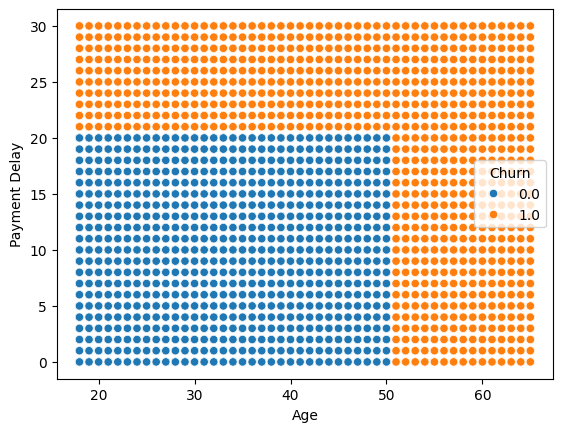

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


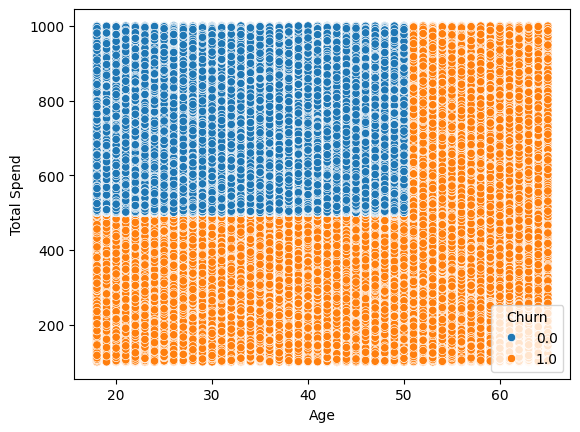

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


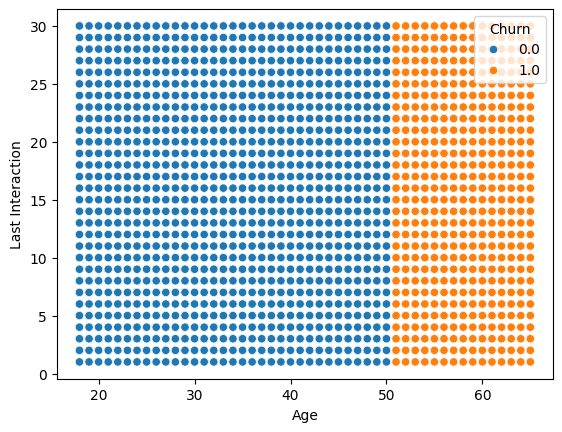

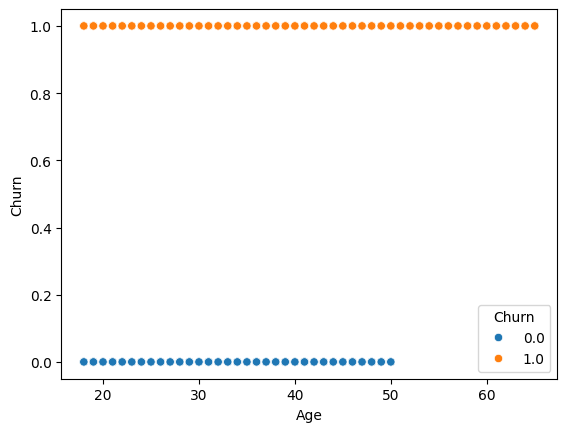

In [199]:
scatter('Age',num_cols)